In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Datos del problema
mu = 5000  # Media de las reclamaciones
sigma = 2000  # Desviación estándar de las reclamaciones
prima = 7500  # Prima cobrada por póliza
capital_inicial = 20000  # Capital inicial
costo_reaseguro = 1000  # Costo del reaseguro
lambda_siniestros = 1  # Tasa de siniestralidad (1 siniestro por año)

In [3]:
# Función para calcular el beneficio esperado
def beneficio_esperado(alpha):
    # Pérdida total esperada
    perdida_total = alpha * mu
    # Beneficio esperado
    beneficio = prima - (1 - alpha) * mu - costo_reaseguro
    return beneficio

In [4]:
# Función para calcular la probabilidad de ruina
def probabilidad_ruina(alpha, capital):
    # Pérdida total con reaseguro
    perdida_con_reaseguro = (1 - alpha) * norm.rvs(mu, sigma, size=10000)
    capital_final = capital + prima - perdida_con_reaseguro
    return np.mean(capital_final < 0)

In [5]:
# Rango de valores de α (0 a 1)
alpha_values = np.linspace(0, 1, 100)
beneficios = []
probabilidades_ruina = []

for alpha in alpha_values:
    beneficios.append(beneficio_esperado(alpha))
    probabilidades_ruina.append(probabilidad_ruina(alpha, capital_inicial))

In [6]:
# Encontrar el α que maximiza el beneficio esperado y minimiza la probabilidad de ruina
mejor_indice = np.argmax(beneficios)
mejor_alpha = alpha_values[mejor_indice]
mejor_beneficio = beneficios[mejor_indice]
mejor_probabilidad_ruina = probabilidades_ruina[mejor_indice]

In [7]:
# Resultados
print(f"Nivel óptimo de reaseguro (α): {mejor_alpha:.2f}")
print(f"Beneficio esperado: {mejor_beneficio:.2f} USD")
print(f"Probabilidad de ruina: {mejor_probabilidad_ruina:.2f}")

Nivel óptimo de reaseguro (α): 1.00
Beneficio esperado: 6500.00 USD
Probabilidad de ruina: 0.00


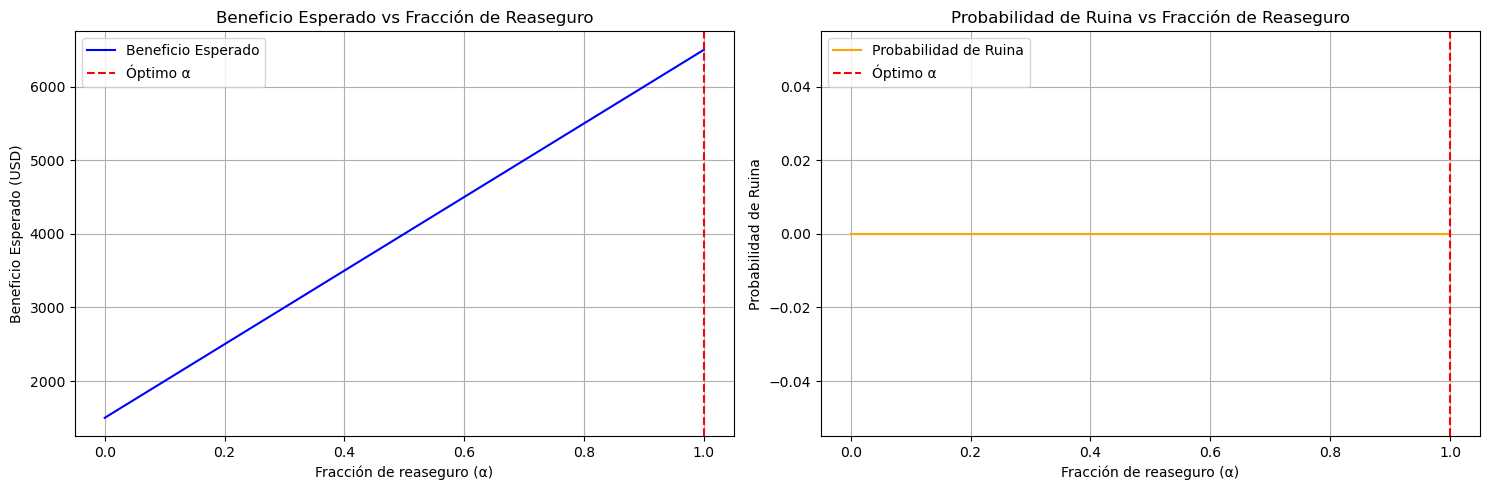

In [8]:
# Gráficas
plt.figure(figsize=(15, 5))

# Gráfica de beneficio esperado
plt.subplot(1, 2, 1)
plt.plot(alpha_values, beneficios, label='Beneficio Esperado', color='blue')
plt.xlabel('Fracción de reaseguro (α)')
plt.ylabel('Beneficio Esperado (USD)')
plt.title('Beneficio Esperado vs Fracción de Reaseguro')
plt.grid()
plt.axvline(mejor_alpha, color='red', linestyle='--', label='Óptimo α')
plt.legend()

# Gráfica de probabilidad de ruina
plt.subplot(1, 2, 2)
plt.plot(alpha_values, probabilidades_ruina, label='Probabilidad de Ruina', color='orange')
plt.xlabel('Fracción de reaseguro (α)')
plt.ylabel('Probabilidad de Ruina')
plt.title('Probabilidad de Ruina vs Fracción de Reaseguro')
plt.grid()
plt.axvline(mejor_alpha, color='red', linestyle='--', label='Óptimo α')
plt.legend()

plt.tight_layout()